# Russian Wholesale Electricity Market

## Context

On 1st September 2006, the Wholesale Electricity and Capacity Market was launched in Russia. The nodal pricing system is applied to the wholesale market: each node gets an individual price value for a certain hour. For the price analysis and forecast problem, the analyst uses the weighted average of the nodal prices for certain territory such as price zone, united energy system and others. More details about the Wholesale Electricity and Capacity Market of Russia you will find in my latest paper The Three-Headed Dragon: Electricity, Trading, Analysis.﻿

## Content

The data files include

* the weighted average of the nodal day ahead prices for the European and Siberian price zones of the market;
* the weighted average of the nodal day ahead prices for six United Energy Systems: NorthWest, Centre, Ural, South, Middle Volga and Siberia;
* the day ahead scheduled volume for the European and Siberian price zones;
* the weighted average of the nodal intraday prices for three United Energy Systems: NorthWest, Centre and Siberia

Time stamps are in Europe/Moscow timezone.

For more details, please see [The Three-Headed Dragon: Electricity, Trading, Analysis](https://www.mbureau.energy/articles/three-headed-dragon-electricity-trading-analysis-first-head-electricity).

## CHALLENGES
Electricity is a commodity capable of being bought, sold, and traded. All nations are moving towards a
Deregulated Electricity Market System where the competitors are allowed to buy and sell electricity by
permitting market participants to invest in power plants and transmission lines. Also, it offers a broader
range of renewable energy options - the need of the hour.
This system has paved the way for Data Scientists/ Machine Learning Engineers to extensively participate in
the growing dynamic energy management systems. The spectrum includes predicting energy requirements,
prices, network grid analysis, etc.

## PROJECT DESCRIPTION: WHOLESALE ELECTRICITY MARKET DATASET
Addressing the high demand for power, on the 1st of September 2006, the Wholesale Electricity and
Capacity Market was launched in Russia. Now, both the price and electricity consumption forecast problem
is highly important on the Wholesale Electricity Market. Thus, the questions:

* What price should we expect tomorrow, next week, next year?
* What electricity consumption should we expect tomorrow, next week, next year?

It is important to employ analysts, ML Engineers, and Data Scientists to extract patterns from data to derive
insights that could help different aspects of the operation.

Reference : https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set()
pd.set_option('display.max_rows', None) 

In [182]:
#fetch files from directory
pathcwd = os.getcwd()
path = pathcwd + "/Project data/Russian Electricity Data 2006"
files = glob.glob(path + "/*.csv")
files

['/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv']

In [183]:
for file in files:
    print(file)

/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv


In [184]:
UES_intraday_price = pd.read_csv(files[0])
PZ_dayahead_price_volume = pd.read_csv(files[1])
UES_dayahead_price = pd.read_csv(files[2])
UES_intraday_price.head()


timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829

In [185]:
UES_intraday_price.head()

timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829

In [186]:
PZ_dayahead_price_volume.head()

timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0

In [187]:
UES_dayahead_price.head()

timestep  UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
0  2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
1  2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2  2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
3  2017-01-01 03:00         888.44      1002.38            976.34     906.15   
4  2017-01-01 04:00         847.10      1002.58            945.28     894.08   

   UES_Center  UES_South  
0     1050.17    1706.30  
1     1051.15    1592.17  
2     1039.84    1561.85  
3      977.04    1534.37  
4      938.27    1517.58

In [5]:
def data_details(data):
    head = data.head()
    info = data.info()
    describe = data.describe()
    any_null = data.isnull().any()
    
    return (print(head),
                  print(info), 
                  print(describe),
                  print(any_null))

In [6]:
data_details(UES_intraday_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestep       24072 non-null  object
 1   UES_Northwest  24072 non-null  int64 
 2   UES_Siberia    24072 non-null  int64 
 3   UES_Center     24072 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 752.4+ KB
           timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829
None
       UES_Northwest   UES_Siberia    UES_Center
count   24072.000000  24072.000000  24072.000000
mean      990.692921    794.586200   1210.754944
std       316.709637    259.351579    356.775935
min         0.000000 

(None, None, None, None)

### 0 Minimum Values ????
Notice that the minimum values for all three regions is Zero (0). Since we are talking about prices it is mostly unlikely that there are hours/periods where electricity is free. So we assume these are errors.

Or does that mean there was no power supply within those hours?? THEM DEY TAKE LIGHT FOR RUSSIA??????

Let's count the number of Zero values in each region.



In [10]:
count = 0
count1 = 0
count2 = 0
for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        count += 1
    if i[2] == 0:
        count1 += 1
    if i[3] == 0:
        count2 += 1
print (f"There are {count} - 0 values in UES_Northwest")
print (f"There are {count1} - 0 values in UES_Siberia")
print (f"There are {count2} - 0 values in UES_Center")

There are 63 - 0 values in UES_Northwest
There are 642 - 0 values in UES_Siberia
There are 73 - 0 values in UES_Center


In [11]:
"""# print timestamp of each zero values

for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        print (i)"""
    

timestep         2017-01-26 00:00
UES_Northwest                   0
UES_Siberia                   309
UES_Center                      0
Name: 600, dtype: object
timestep         2017-01-26 01:00
UES_Northwest                   0
UES_Siberia                   318
UES_Center                      1
Name: 601, dtype: object
timestep         2017-04-16 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2543, dtype: object
timestep         2017-04-21 01:00
UES_Northwest                   0
UES_Siberia                   304
UES_Center                      0
Name: 2641, dtype: object
timestep         2017-04-28 02:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2810, dtype: object
timestep         2017-05-01 03:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2883, dtype: object
timestep         2017-05-03 04

timestep         2018-11-18 02:00
UES_Northwest                   0
UES_Siberia                   833
UES_Center                    540
Name: 16466, dtype: object
timestep         2018-11-18 03:00
UES_Northwest                   0
UES_Siberia                   834
UES_Center                    538
Name: 16467, dtype: object
timestep         2019-05-12 04:00
UES_Northwest                   0
UES_Siberia                  1032
UES_Center                      0
Name: 20668, dtype: object
timestep         2019-07-02 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      3
Name: 21911, dtype: object
timestep         2019-08-26 03:00
UES_Northwest                   0
UES_Siberia                   227
UES_Center                      0
Name: 23211, dtype: object
timestep         2019-09-10 02:00
UES_Northwest                   0
UES_Siberia                   117
UES_Center                      0
Name: 23570, dtype: object
timestep         2019-

In [13]:
data_details(PZ_dayahead_price_volume)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45816 entries, 0 to 45815
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestep         45816 non-null  object 
 1   consumption_eur  45816 non-null  float64
 2   consumption_sib  45816 non-null  float64
 3   price_eur        45816 non-null  float64
 4   price_sib        45816 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB
           timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0
None
       consumption_eur  consumption_sib     price_eur    

(None, None, None, None)

In [14]:
data_details(UES_dayahead_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestep          23952 non-null  object 
 1   UES_Northwest     23952 non-null  float64
 2   UES_Siberia       23952 non-null  float64
 3   UES_Middle_Volga  23952 non-null  float64
 4   UES_Urals         23952 non-null  float64
 5   UES_Center        23952 non-null  float64
 6   UES_South         23952 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB
           timestep  UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
0  2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
1  2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2  2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
3  2017-01-01 03:00         888.44      1002.38            976.34     906.15   
4  2017-01-01 04:

(None, None, None, None)

### Zero Values Explained
After some research, I found that: 

`"If a consumer leaves the price cells empty, it declares its intention to buy electricity at any market price. This type of bid is called a price independent bid. Such bids reflect inelastic demand, as discussed earlier. In 2017 in Russia 99.5% of bids were price independent."`

This explains why there are lots of zero values, especially in 2017.

Further data exploration shows that there are values as low as 1 through 50 in the data set, especially prices. It is worthy to note that the values for each hour is a cummulative average for a particular region the said hour, hence we decide to replace all values from 0 - 50 with the mean values of each region.

### Replace Values between 0 & 50 with mean values



In [6]:
#write function to drop values below 50.0
#1. Convert timestep to datetime data type

def replace_vals(data):
    data.reset_index(drop = True, inplace = True)
    data["timestep"] = pd.to_datetime(data["timestep"])
    data.drop("timestep", axis = 1)
    data.set_index("timestep", drop = True, inplace = True)
    
    #2. replace all values between 0 & 50 with Nan
    
    for item in data:
        data[item] = data[item].mask(data[item] < 50, np.nan)
    
    
    #3. replace all NaN values by mean
    
    data = data.fillna(data.mean(), inplace = True)
    #data.drop("timestep", axis = 1)"""
    return data
    

In [7]:
replace_vals(UES_intraday_price)
UES_intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                   
2017-01-01 00:00:00          767.0        918.0       982.0
2017-01-01 01:00:00          675.0        889.0       848.0
2017-01-01 02:00:00          717.0        933.0       920.0
2017-01-01 03:00:00          683.0        947.0       885.0
2017-01-01 04:00:00          633.0        934.0       829.0

In [8]:
replace_vals(PZ_dayahead_price_volume)
PZ_dayahead_price_volume.head()

consumption_eur  consumption_sib  price_eur   price_sib
timestep                                                                    
2006-09-01 00:00:00          62341.0          17916.0  275.22000  469.245309
2006-09-01 01:00:00          60625.0          17467.0  731.45809  469.245309
2006-09-01 02:00:00          59685.0          17161.0  731.45809  469.245309
2006-09-01 03:00:00          59500.0          17061.0  731.45809  469.245309
2006-09-01 04:00:00          60617.0          17074.0  731.45809  469.245309

In [34]:
PZ_dayahead_price_volume.describe()

consumption_eur  consumption_sib     price_eur     price_sib
count     45816.000000     45816.000000  45816.000000  45816.000000
mean      82294.752037     22297.937294    730.232149    430.219400
std       11046.135452      3035.991381    239.185651    167.183197
min       57847.000000     15328.674800      0.000000      0.000000
25%       74157.500000     19697.000000    563.472500    365.077500
50%       81194.421875     22057.000000    708.590000    470.565000
75%       90337.886718     24788.054198    902.702500    533.752500
max      111722.984400     30666.000000   2135.010000   1029.690000

In [9]:
replace_vals(UES_dayahead_price)
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                       
2017-01-01 00:00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00:00         847.10      1002.58            945.28     894.08   

                     UES_Center  UES_South  
timestep                                    
2017-01-01 00:00:00     1050.17    1706.30  
2017-01-01 01:00:00     1051.15    1592.17  
2017-01-01 02:00:00     1039.84    1561.85  
2017-01-01 03:00:00      977.04    1534.37  
2017-01-01 04:00:00      938.27    1517.58

In [13]:
UES_dayahead_price.describe()

UES_Northwest   UES_Siberia  UES_Middle_Volga     UES_Urals  \
count   23952.000000  23952.000000      23952.000000  23952.000000   
mean     1156.663633    884.747474       1250.445322   1065.649254   
std       259.654809    147.955679        250.353041    158.588677   
min        75.560000     50.440000         72.980000     92.960000   
25%       942.770000    812.827500       1033.537500    941.230000   
50%      1206.395000    907.095000       1316.360000   1079.210000   
75%      1354.622500    983.747500       1440.127500   1183.322500   
max      2488.860000   1229.400000       1822.970000   1518.630000   

         UES_Center     UES_South  
count  23952.000000  23952.000000  
mean    1320.611582   1499.861130  
std      287.771912    357.372344  
min       58.140000     53.650000  
25%     1059.180000   1254.120000  
50%     1400.825000   1605.135000  
75%     1551.875000   1752.300000  
max     2687.760000   5039.830000

### Moving On!


# Visualization

In [10]:
dayahead_price = PZ_dayahead_price_volume
dayahead_price.head()

consumption_eur  consumption_sib  price_eur   price_sib
timestep                                                                    
2006-09-01 00:00:00          62341.0          17916.0  275.22000  469.245309
2006-09-01 01:00:00          60625.0          17467.0  731.45809  469.245309
2006-09-01 02:00:00          59685.0          17161.0  731.45809  469.245309
2006-09-01 03:00:00          59500.0          17061.0  731.45809  469.245309
2006-09-01 04:00:00          60617.0          17074.0  731.45809  469.245309

Text(0, 0.5, 'price_sib')

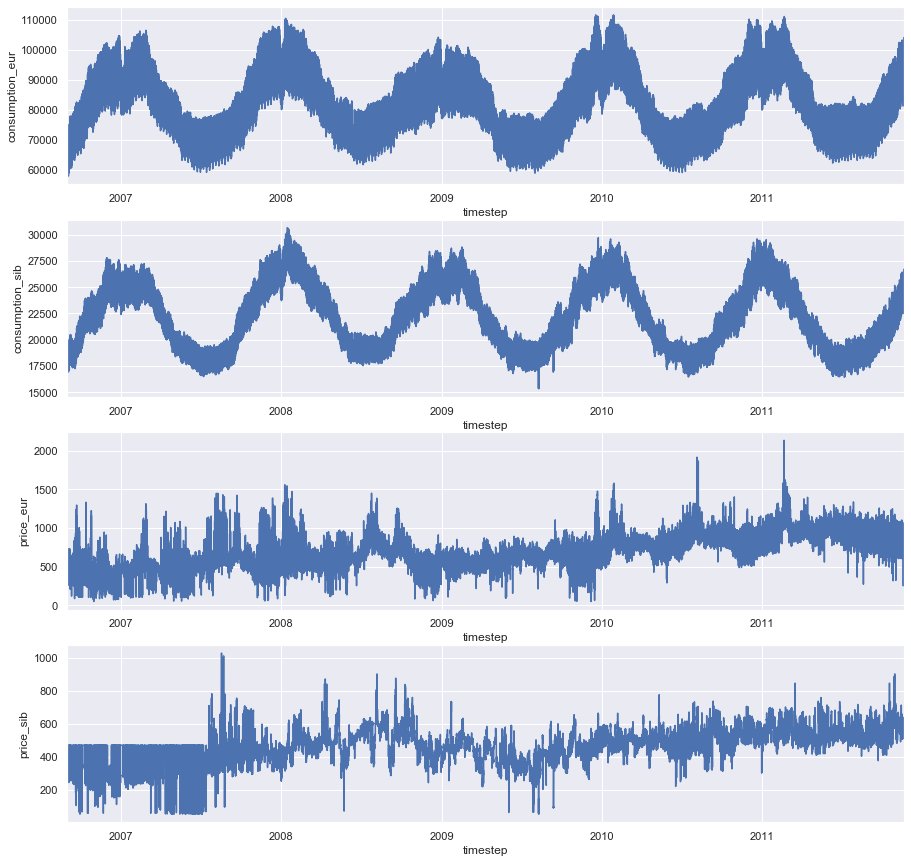

In [11]:
#Time series plot of PZ_dayahead_price_volume
plt.figure(figsize = (15,15))

ax1 = plt.subplot(4, 1, 1)
dayahead_price['consumption_eur'].plot()
ax1.set_ylabel("consumption_eur")

ax2 = plt.subplot(4, 1, 2)
dayahead_price['consumption_sib'].plot()
ax2.set_ylabel("consumption_sib")

ax3 = plt.subplot(4, 1, 3)
dayahead_price['price_eur'].plot()
ax3.set_ylabel("price_eur")

ax4 = plt.subplot(4, 1, 4)
dayahead_price['price_sib'].plot()
ax4.set_ylabel("price_sib")

In [16]:
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                       
2017-01-01 00:00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00:00         847.10      1002.58            945.28     894.08   

                     UES_Center  UES_South  
timestep                                    
2017-01-01 00:00:00     1050.17    1706.30  
2017-01-01 01:00:00     1051.15    1592.17  
2017-01-01 02:00:00     1039.84    1561.85  
2017-01-01 03:00:00      977.04    1534.37  
2017-01-01 04:00:00      938.27    1517.58

Text(0, 0.5, 'UES_South')

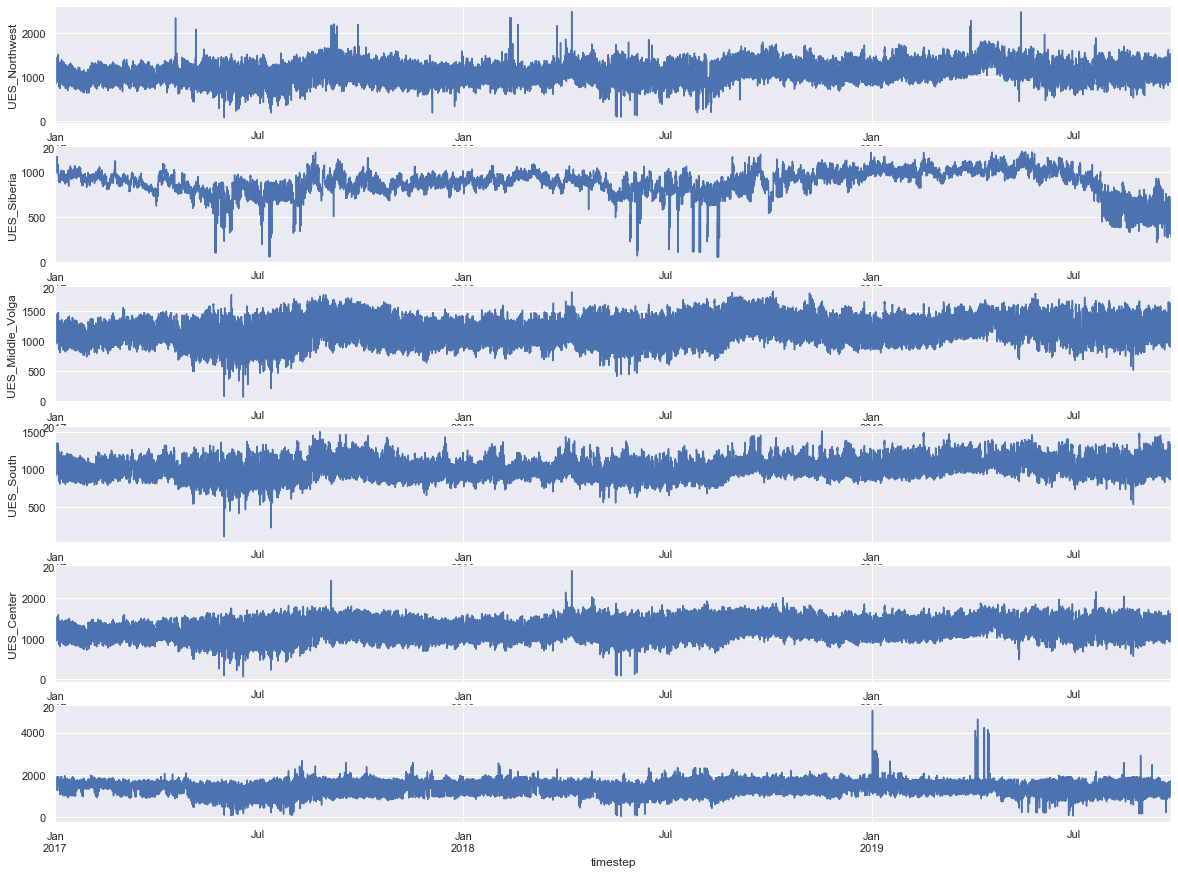

In [12]:
#time series plot for UES_dayahead_price
plt.figure(figsize = (20,15))

ax1 = plt.subplot(6, 1, 1)
UES_dayahead_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(6, 1, 2)
UES_dayahead_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(6, 1, 3)
UES_dayahead_price['UES_Middle_Volga'].plot()
ax3.set_ylabel("UES_Middle_Volga")

ax4 = plt.subplot(6, 1, 4)
UES_dayahead_price['UES_Urals'].plot()
ax4.set_ylabel("UES_Urals")

ax5 = plt.subplot(6, 1, 5)
UES_dayahead_price['UES_Center'].plot()
ax5.set_ylabel("UES_Center")

ax6 = plt.subplot(6, 1, 6)
UES_dayahead_price['UES_South'].plot()
ax4.set_ylabel("UES_South")

In [14]:
intraday_price = UES_intraday_price
intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                   
2017-01-01 00:00:00          767.0        918.0       982.0
2017-01-01 01:00:00          675.0        889.0       848.0
2017-01-01 02:00:00          717.0        933.0       920.0
2017-01-01 03:00:00          683.0        947.0       885.0
2017-01-01 04:00:00          633.0        934.0       829.0

Text(0, 0.5, 'UES_Center')

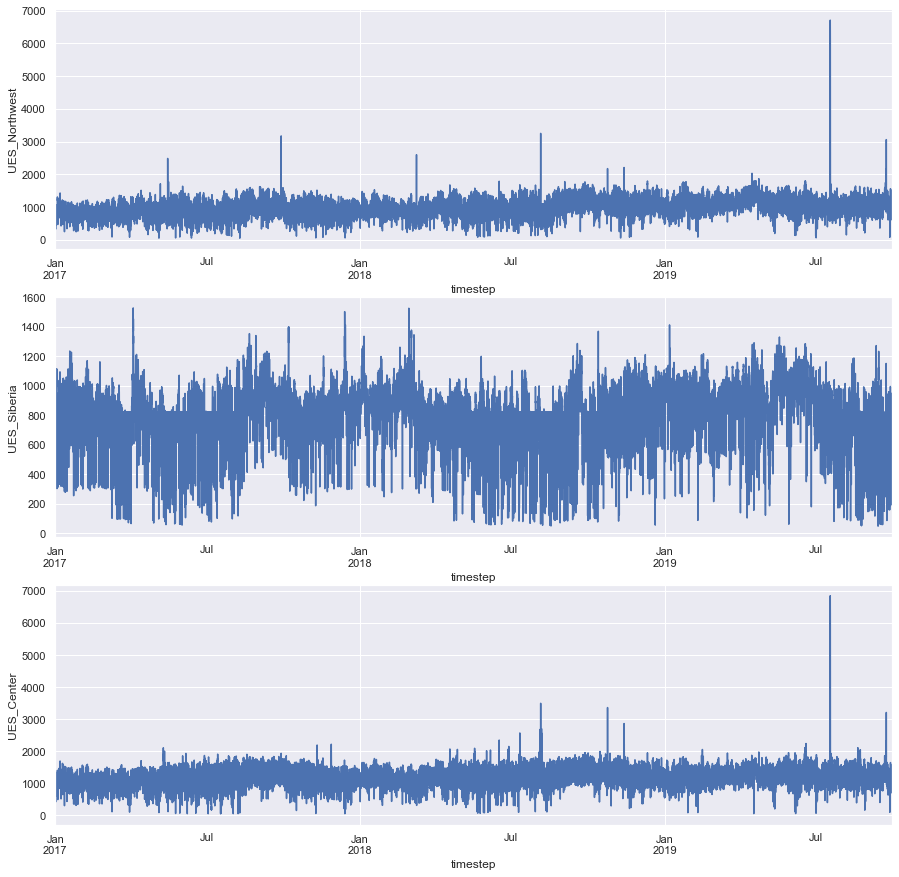

In [15]:
#time series plot for intraday_price
plt.figure(figsize = (15,15))

ax1 = plt.subplot(3, 1, 1)
intraday_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(3, 1, 2)
intraday_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(3, 1, 3)
intraday_price['UES_Center'].plot()
ax3.set_ylabel("UES_Center")


## THE PROPHET

In [107]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

import chart_studio.plotly as py
from plotly.graph_objs import * 
import plotly.tools as tls
import chart_studio.tools as ctls

from prophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

import plotly.express as px


%matplotlib inline

### Modeling with `Prophet`

In [ ]:

#conda install -c conda-forge fbprophet

In [110]:
#log in to plotly

username = "azeezraimi26"
api_key = "WD0xj3CPaUSN9t1B60xy"

In [111]:
ctls.set_credentials_file(username = username, api_key = api_key)

In [59]:
#Functions for weekly prediction

#import Prophet

#Functions to automate

#resample data by week
def resample_weekly(data):
    #data.reset_index(drop = True, inplace = True)
    #data["timestep"] = pd.to_datetime(data["timestep"])
    #data.drop("timestep", axis = 1)

    #Aggregate data
    global weekly_data 
    daily_data = data.groupby("timestep").mean()
    weekly_data = daily_data.resample("W").mean()
     
    return weekly_data

# Plot the weekly data
def plot_data(data):
    for col in data.columns:
        plt.figure(figsize=(17, 8))
        plt.plot(data[col])
        plt.xlabel('timestep')
        plt.ylabel(col)
        plt.title(f"Weekly Data for {col}")
        plt.grid(True)
        plt.show()
    


#Modeling

#Create single dataset & Change columns
def single_data(data):
    global wd_cons
    global lst
    lst = []
    for col in data:
        wd_con = pd.DataFrame(data[col], index = data.index)
        wd_cons = wd_con.reset_index()
        wd_cons.columns = ["ds", "y"]
        lst.append(wd_cons)

    return lst

#split into test train data (last 30 values), Train & Predict model

def split(lst):
    global my_model
    global fut
    global split_data
    fcst_size = 20
    split_data = []
    for dt in lst:
        data = dt.copy() 
        splited = data[: - fcst_size]
        split_data.append(splited)
        
    return split_data

def train_predict(split_data):
    global model_lst
    global forcast_lst
    global fcst_size
    fcst_size = 20
    forcast_lst = []
    model_lst = []
    for tr in split_data:
        my_model = Prophet().fit(tr)
        model_lst.append(my_model)
        fut = my_model.make_future_dataframe(periods = fcst_size, freq = "W")
        forcast = my_model.predict(fut)
        forcast_lst.append(forcast)
        
    return forcast_lst
    

#plot Prediction
def plot_prediction(pred_lst, weekly_data):
    for fcst, mod, col in zip(forcast_lst, model_lst, weekly_data):
        mod.plot(fcst)
        plt.title(f"Prediction plot for {col}")
        pred_table(fcst)

#plot forcast components
def plot_pred_comp(pred_lst, weekly_data):
    for fcst, mod, col in zip(forcast_lst, model_lst, weekly_data):
        mod.plot_components(pd.DataFrame(fcst))
        plt.title(f"Prediction Components plot for {col}")

#evaluate Model
def evaluate(historical, predicted):
        eval_data = predicted.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))
        return eval_data 
    
    
#eval_data = evaluate(wd_cons, prediction)
#eval_data.head()

def pred_errors(df, prediction_size):
    #df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[- fcst_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

#for err_name, err_value in pred_errors(eval_data, pred_size).items():
   # print(err_name, err_value)

    
#print Prediction table
def pred_table(data):
    global table
    table = pd.DataFrame(data, columns = ["y", "yhat", "yhat_lower", "yhat_upper"], index = data.index)
    table.columns = ["Actul Value", "Prediction", "Pred_lower", "Pred_Upper"]
    return table.tail(10)


"""# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(eval_data['yhat'], label = "prediction")
plt.plot(eval_data['yhat_lower'], label = "pred_lower")
plt.plot(eval_data['yhat_upper'], label = "pred_high")
plt.plot(eval_data['y'], label = "Actual Value")
plt.xlabel('Timestep')
plt.ylabel(wd_con.columns.values)
plt.title(f"prediction for {wd_con.columns.values}")
plt.grid(False)
plt.legend()
plt.show()"""



'# Plot forecast with upper and lower bounds\nplt.figure(figsize=(17, 8))\nplt.plot(eval_data[\'yhat\'], label = "prediction")\nplt.plot(eval_data[\'yhat_lower\'], label = "pred_lower")\nplt.plot(eval_data[\'yhat_upper\'], label = "pred_high")\nplt.plot(eval_data[\'y\'], label = "Actual Value")\nplt.xlabel(\'Timestep\')\nplt.ylabel(wd_con.columns.values)\nplt.title(f"prediction for {wd_con.columns.values}")\nplt.grid(False)\nplt.legend()\nplt.show()'

### Prediction for `PZ_dayahead_price_volume`

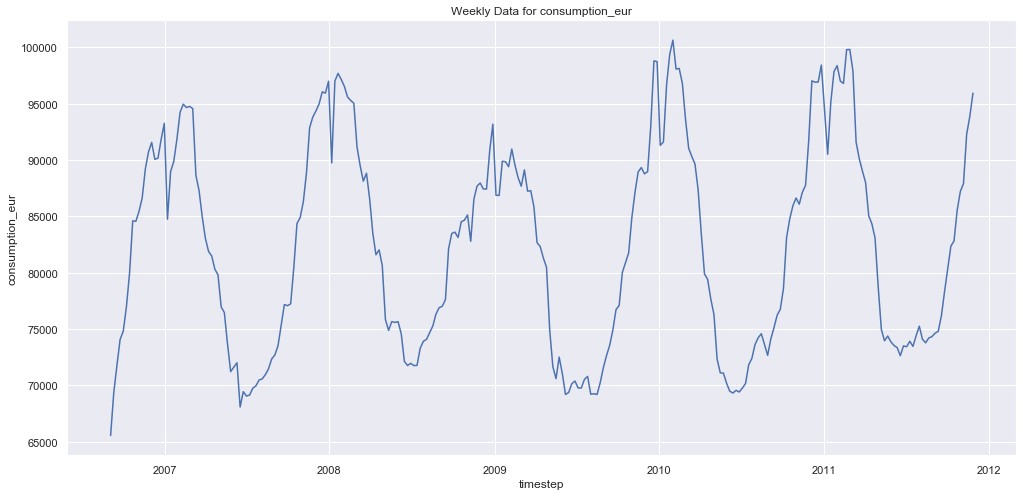

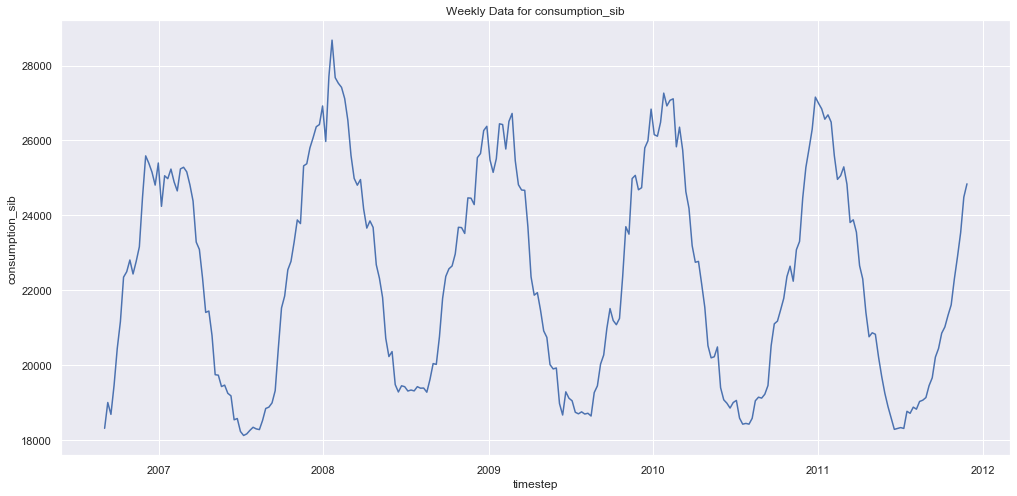

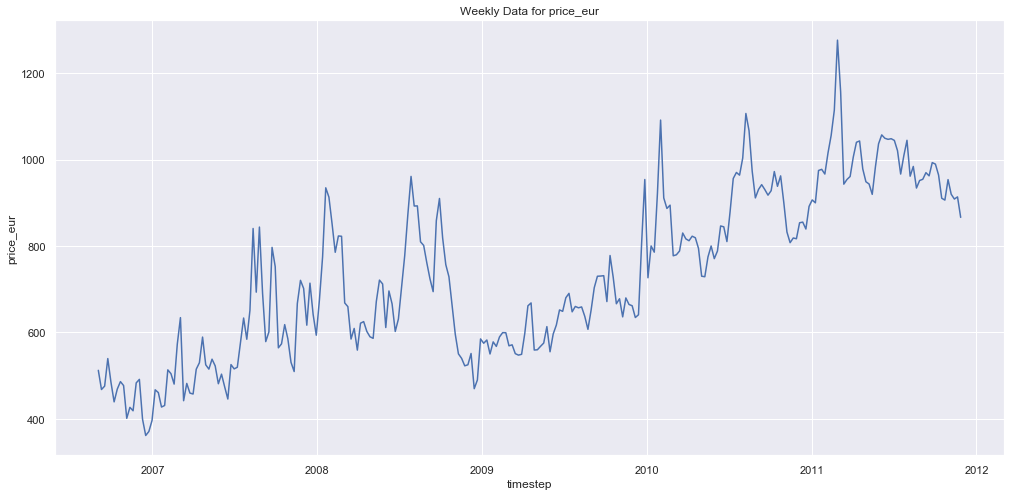

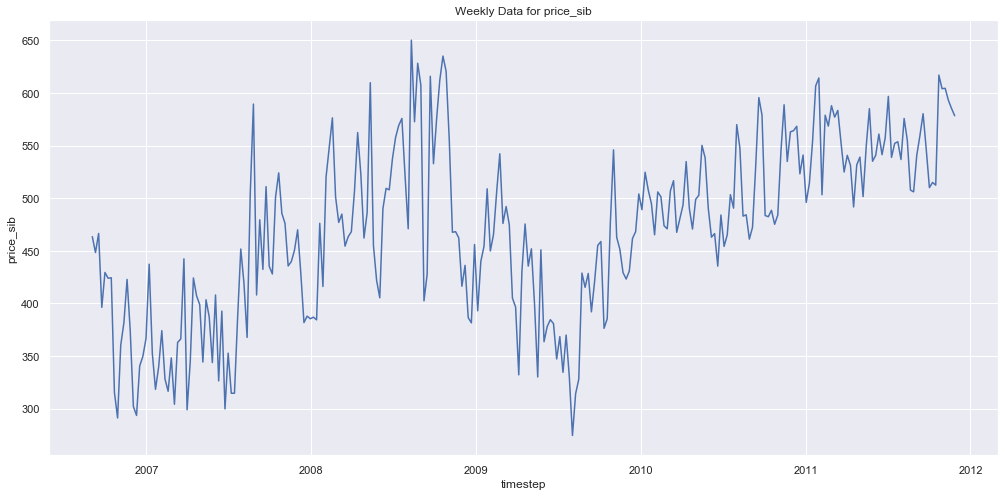

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 1.8932597176731956, 'MAE': 1409.212282284991}
{'MAPE': 2.075248902273544, 'MAE': 399.4745931798958}
{'MAPE': 12.725015386176604, 'MAE': 124.04210675923446}
{'MAPE': 6.522074084128914, 'MAE': 35.48151816246488}


      Actul Value    Prediction    Pred_lower    Pred_Upper
254  73458.000000  74165.173563  71370.163077  76685.283644
255  74400.672619  74784.857084  72021.413632  77448.965795
256  75256.202381  75306.221783  72610.353172  78016.064143
257  74102.410714  75615.072737  72809.037255  78213.464566
258  73778.934524  75750.815769  72981.818366  78248.825745
259  74202.922619  75899.246828  73189.178425  78739.814903
260  74325.565476  76261.962208  73457.683493  78944.526248
261  74630.160714  76949.125118  74315.496449  79537.805560
262  74796.690476  77988.478522  75412.757819  80662.484230
263  76169.023810  79375.186498  76592.668923  82055.564704


      Actul Value    Prediction    Pred_lower    Pred_Upper
254  18768.011905  18116.490869  17534.555376  18725.014529
255  18714.940476  18029.450686  17396.983830  18657.789154
256  18879.160714  18029.796781  17447.590675  18664.206191
257  18825.648810  18124.718762  17529.079060  18714.946300
258  19030.904762  18264.757888  17652.575570  18858.636217
259  19064.375000  18402.498628  17799.104262  19036.593007
260  19134.898810  18553.625563  17898.861623  19163.059566
261  19453.773810  18796.450166  18173.887711  19375.191122
262  19662.053571  19202.343034  18613.936827  19788.891661
263  20215.107143  19759.335333  19152.764325  20357.312160


     Actul Value   Prediction   Pred_lower   Pred_Upper
254   966.566905  1134.170674  1051.719567  1225.591279
255  1008.975417  1170.498184  1083.614811  1263.278336
256  1044.716905  1207.290001  1112.887866  1292.746307
257   961.611250  1228.862048  1134.336809  1318.219419
258   984.167798  1223.628371  1131.461239  1313.525691
259   934.179940  1196.437614  1104.475670  1287.663315
260   951.634583  1166.306760  1069.221713  1252.173014
261   954.461071  1151.980635  1061.225684  1242.414695
262   969.791905  1158.990309  1064.796363  1261.784866
263   962.388095  1178.453633  1084.522272  1270.900113


     Actul Value  Prediction  Pred_lower  Pred_Upper
254   552.067679  533.220675  461.017461  608.104842
255   553.651369  534.841412  464.739863  610.697228
256   536.746548  540.722477  467.824108  614.950586
257   575.741548  555.175469  481.034606  627.437123
258   555.147500  574.483175  500.428961  647.853361
259   507.671429  589.330532  517.684993  664.887847
260   505.976964  593.733457  524.163350  662.744768
261   540.851488  591.011761  517.803781  672.357190
262   559.541071  590.102960  518.091328  668.071840
263   580.292500  596.069993  523.622580  663.471346


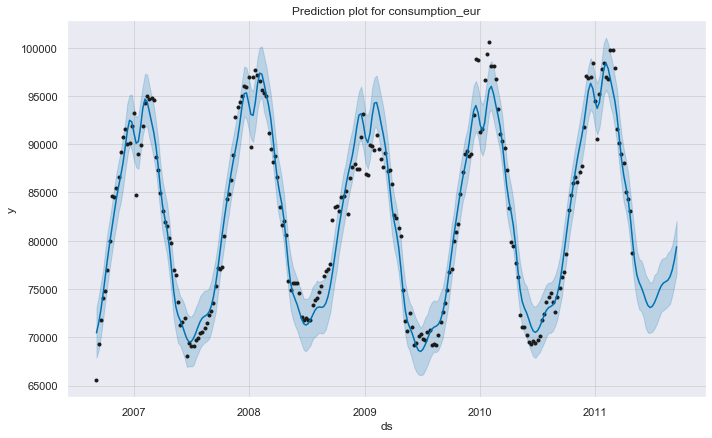

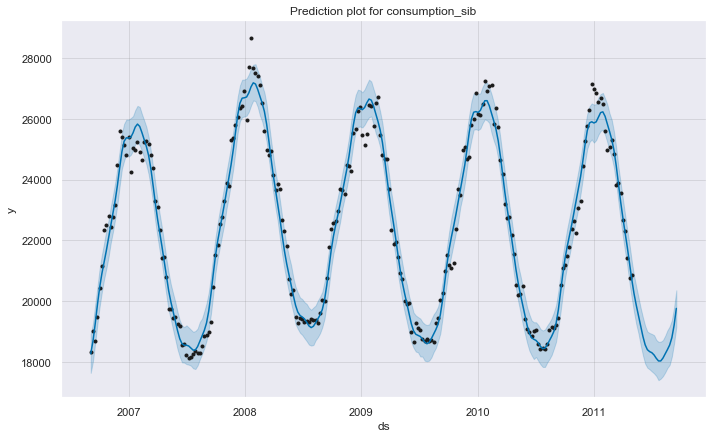

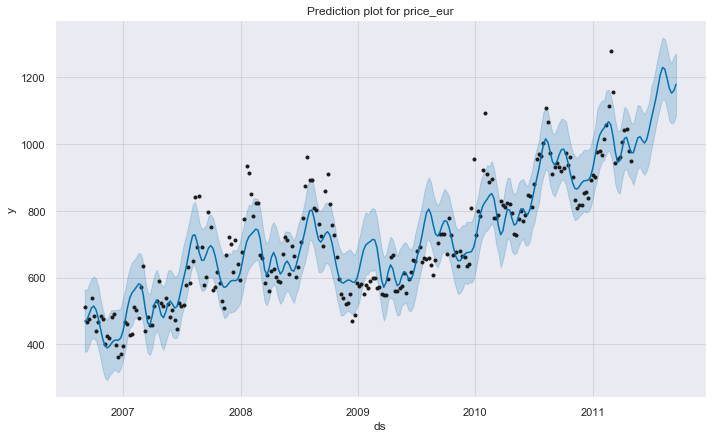

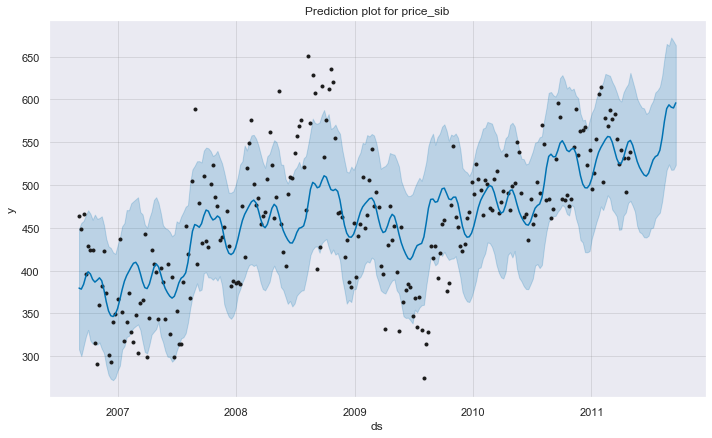

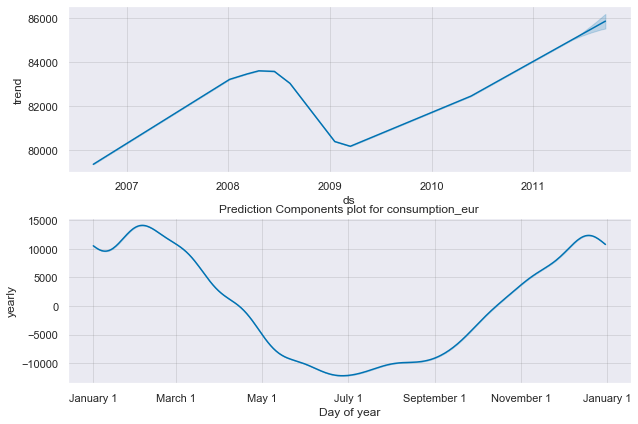

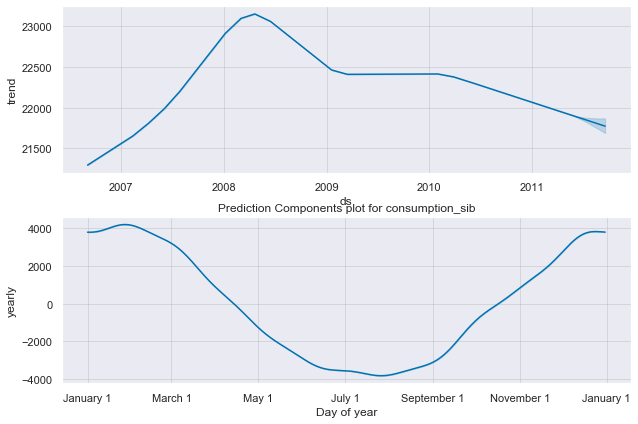

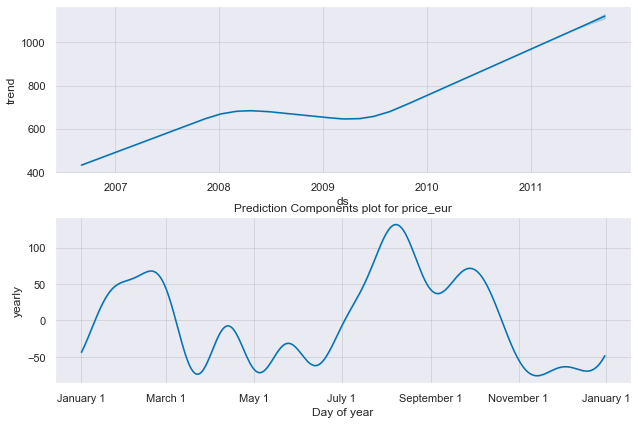

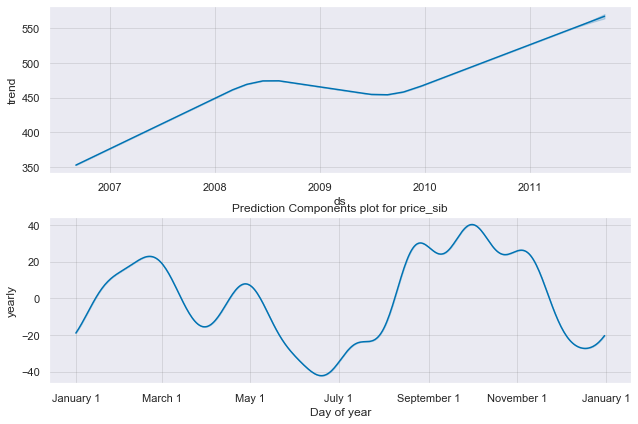

In [172]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(PZ_dayahead_price_volume)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
count = 0
for item, ls, colu in zip(forcast_lst, lst, weekly_data):
    item = item[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    item["y"] = ls[["y"]]
    item = item.sort_index(axis = 1)
    df = item
    l = locals()
    cols_plt = ["y", "yhat", "yhat_lower", "yhat_upper"]
    l["fig_" + str(count)] = px.line(df, x= "ds", y= ["y", "yhat", "yhat_lower", "yhat_upper"], 
                  hover_data={"ds": "|%B %d, %Y"}, 
                  title= (f'Time series Prediction Plot for {colu} UES_intraday_price' ))
    l["fig_" + str(count)].update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")])))
    l["fig_" + str(count)].show()
    count += 1
    print(pd.DataFrame(pred_table(item)))


In [181]:
py.plot(fig_0, filename = 'Time series Prediction Plot for Consumption_eur PZ_dayahead_price_volume', auto_open = False)
py.plot(fig_1, filename = 'Time series Prediction Plot for Consumption_sib PZ_dayahead_price_volume', auto_open = False)
py.plot(fig_2, filename = 'Time series Prediction Plot for Price_eur PZ_dayahead_price_volume', auto_open = False)
py.plot(fig_3, filename = 'Time series Prediction Plot for Price_sib PZ_dayahead_price_volume', auto_open = False)

'https://plotly.com/~azeezraimi26/63/'

### Prediction for `UES_intraday_price`

In [93]:
UES_intraday_price.tail()

UES_Northwest  UES_Siberia   UES_Center
timestep                                                    
2019-09-30 19:00:00     852.000000   509.000000   998.000000
2019-09-30 20:00:00     890.000000   535.000000   978.000000
2019-09-30 21:00:00     928.000000   287.000000  1002.000000
2019-09-30 22:00:00     753.000000   266.000000   817.000000
2019-09-30 23:00:00    1001.551556   822.578753  1223.142527

In [48]:
intraday_price = UES_intraday_price.copy()

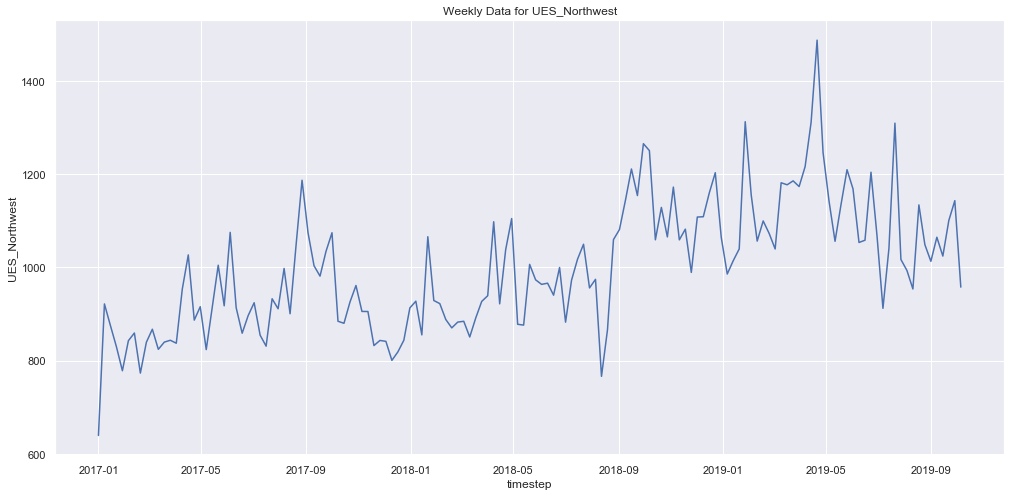

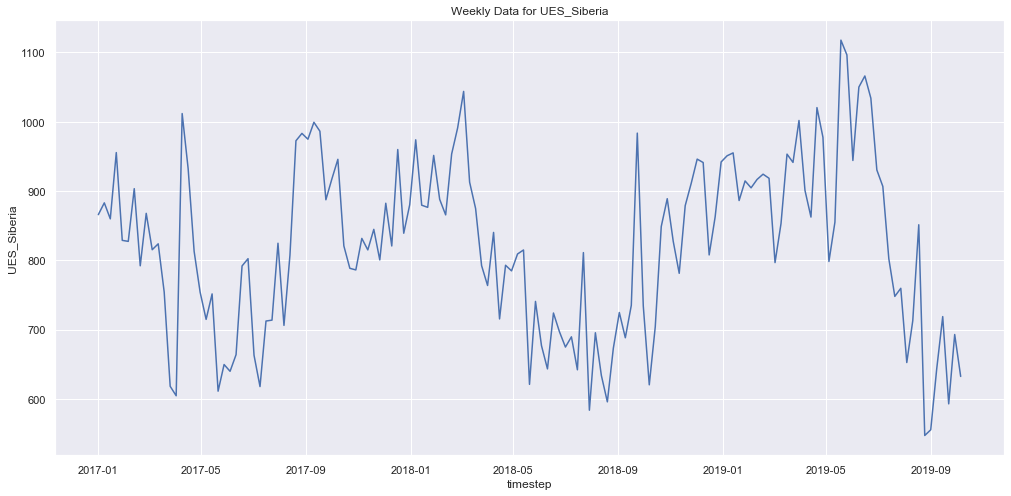

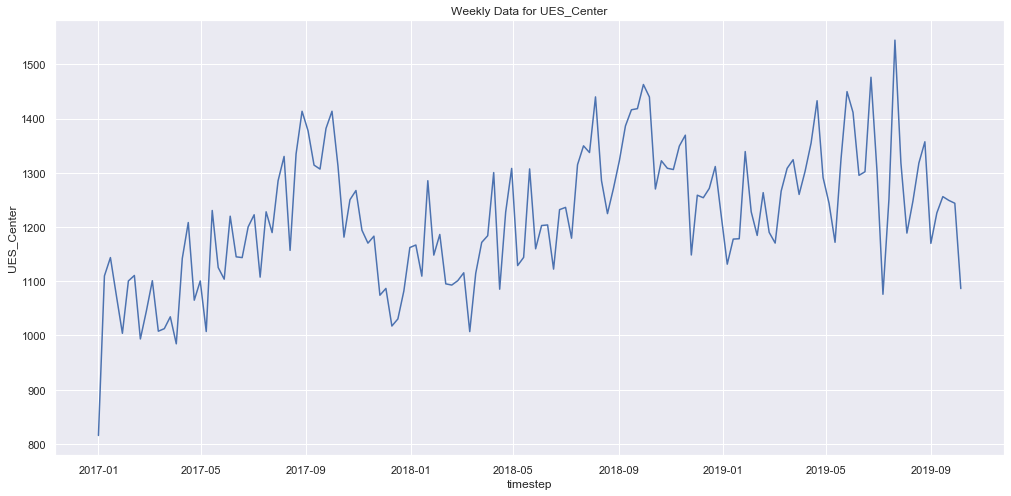

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 9.826524719008916, 'MAE': 107.4644814632084}
{'MAPE': 22.77466207986687, 'MAE': 223.5886683695187}
{'MAPE': 6.53621092237403, 'MAE': 85.60889968726532}


     Actul Value   Prediction   Pred_lower   Pred_Upper
125  1209.505952  1250.069280  1157.826777  1340.680843
126  1168.315476  1271.713198  1191.606298  1364.514527
127  1053.405989  1263.275695  1171.262000  1346.322898
128  1058.253283  1228.961598  1149.031581  1315.133322
129  1204.101190  1193.143213  1103.708275  1277.420153
130  1068.827381  1184.809578  1101.950897  1276.327483
131   912.165225  1212.125083  1120.041736  1308.281436
132  1040.851190  1251.004377  1163.098578  1341.647414
133  1309.351190  1265.192968  1184.235743  1347.892545
134  1016.922619  1242.976420  1158.994609  1333.183876


     Actul Value  Prediction  Pred_lower  Pred_Upper
125  1096.380952  644.186874  545.765606  742.705075
126   944.035714  642.468078  540.161958  741.341143
127  1049.958333  664.650903  564.219054  760.663530
128  1065.970238  693.117323  591.722166  795.849817
129  1033.898810  704.252682  597.596705  800.199213
130   930.346176  690.184315  591.263341  786.093105
131   906.604635  667.013235  566.853385  769.139056
132   802.279762  658.580131  556.196804  756.809958
133   747.882827  672.461515  565.849876  768.565004
134   759.586778  694.537460  597.638595  787.110261


     Actul Value   Prediction   Pred_lower   Pred_Upper
125  1449.660714  1307.076785  1229.871558  1388.139317
126  1411.375000  1300.572143  1216.312770  1382.508131
127  1295.258498  1302.832669  1221.662186  1377.410347
128  1301.917515  1311.436689  1233.715780  1394.017033
129  1476.154762  1314.814600  1231.880983  1397.937647
130  1304.005952  1313.981554  1236.445640  1390.731534
131  1075.924316  1326.149262  1242.154702  1410.886428
132  1251.279762  1362.820881  1285.046317  1443.227090
133  1544.601190  1410.538246  1329.103635  1494.396071
134  1317.958333  1441.034408  1360.450174  1522.024380


'https://plotly.com/~azeezraimi26/1/'

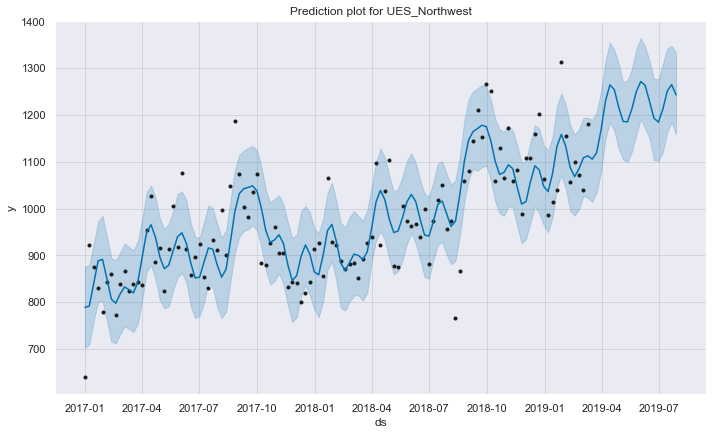

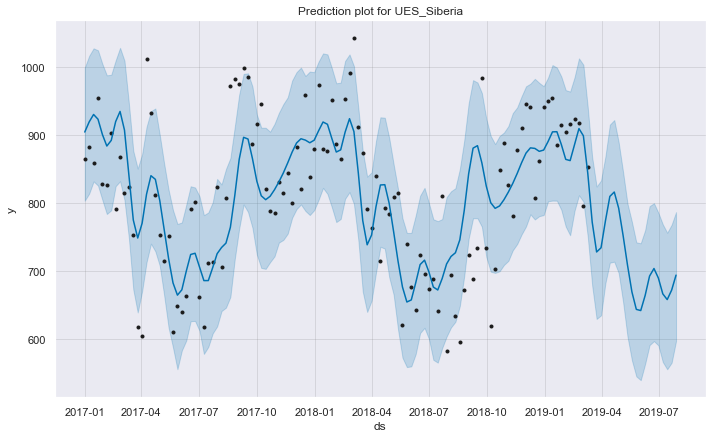

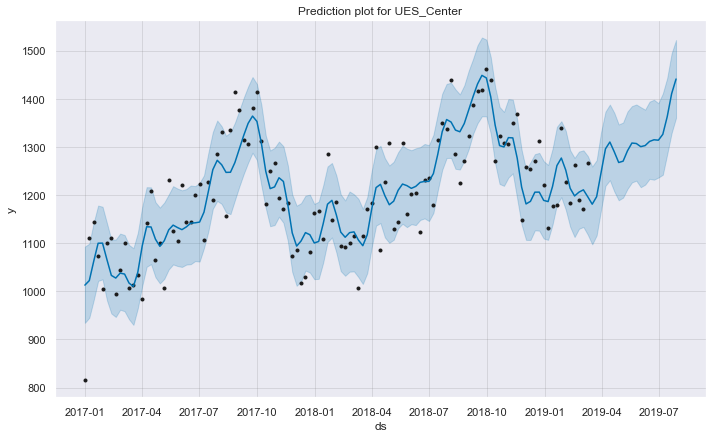

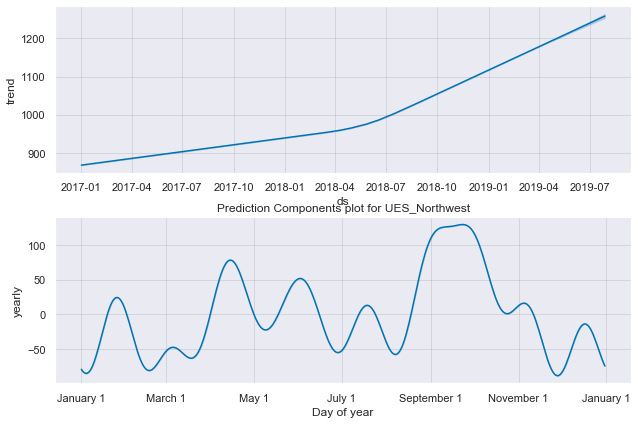

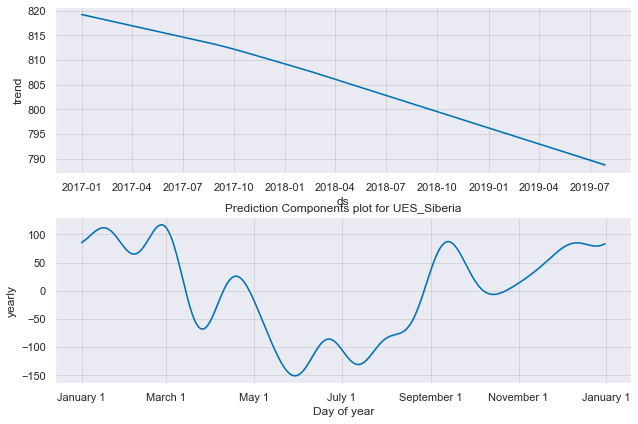

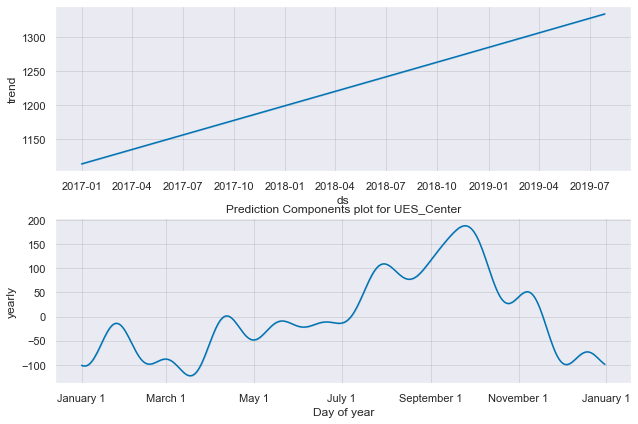

In [166]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(intraday_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print (pred_error)

# Plot forecast with upper and lower bounds
count = 0
for item, ls, colu in zip(forcast_lst, lst, weekly_data):
    item = item[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    item["y"] = ls[["y"]]
    item = item.sort_index(axis = 1)
    df = item
    l = locals()
    cols_plt = ["y", "yhat", "yhat_lower", "yhat_upper"]
    l["fig_" + str(count)] = px.line(df, x= "ds", y= ["y", "yhat", "yhat_lower", "yhat_upper"], 
                  hover_data={"ds": "|%B %d, %Y"}, 
                  title= (f'Time series Prediction Plot for {colu} UES_intraday_price' ))
    l["fig_" + str(count)].update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")])))
    l["fig_" + str(count)].show()
    count += 1
    print(pd.DataFrame(pred_table(item)))
    


### Prediction for  `UES_dayahead_price`

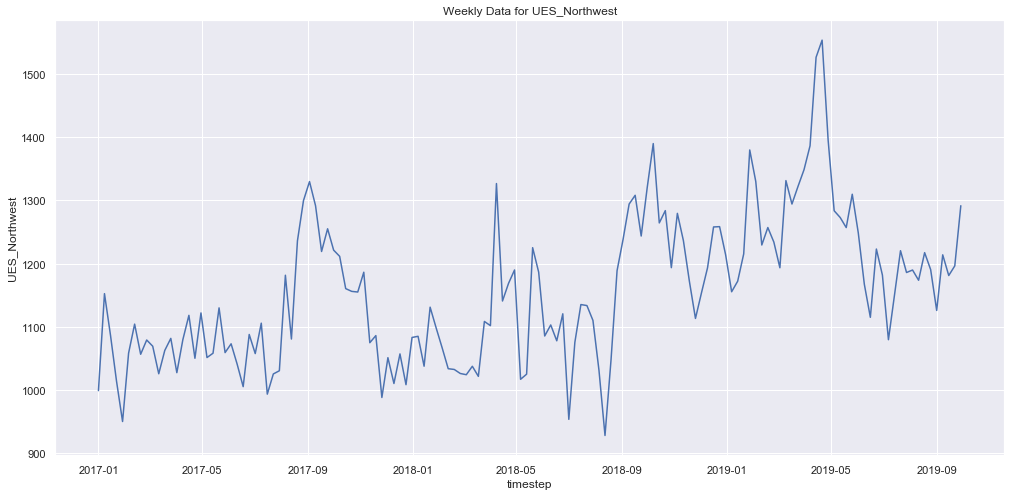

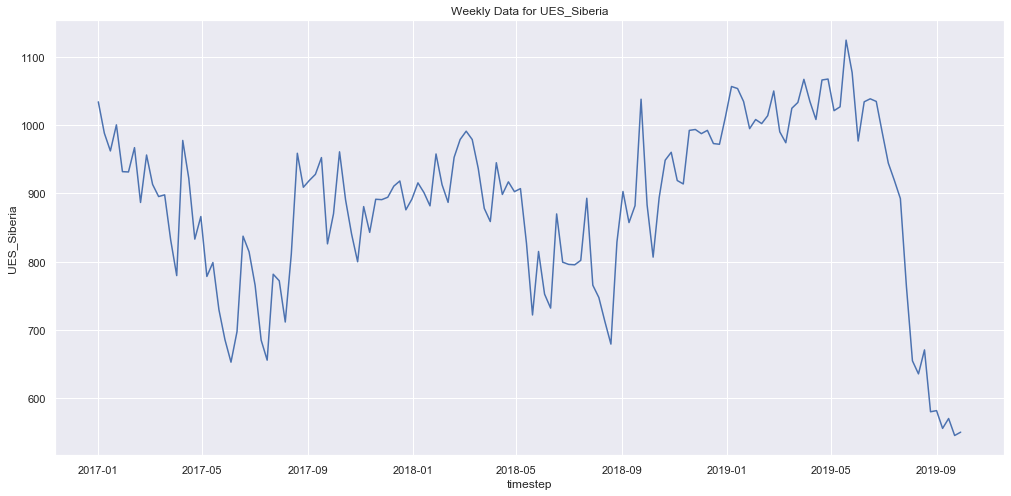

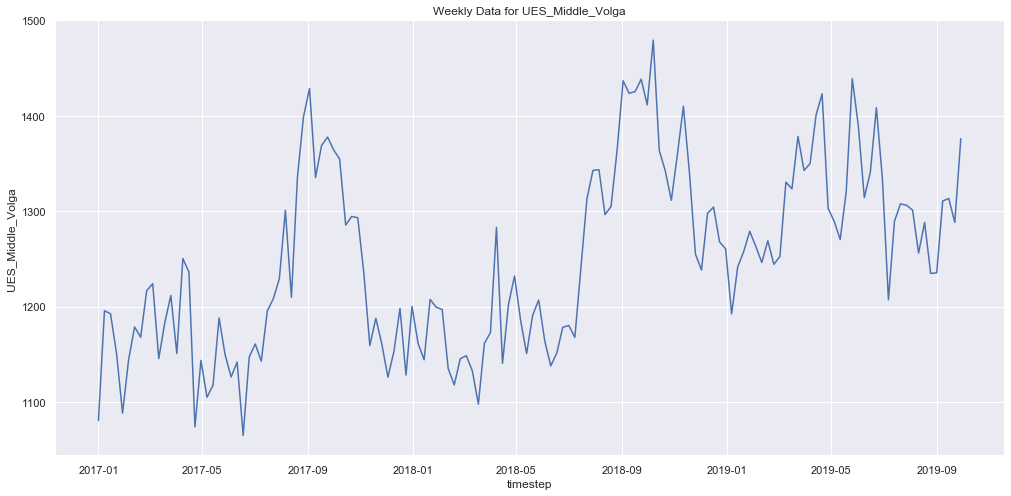

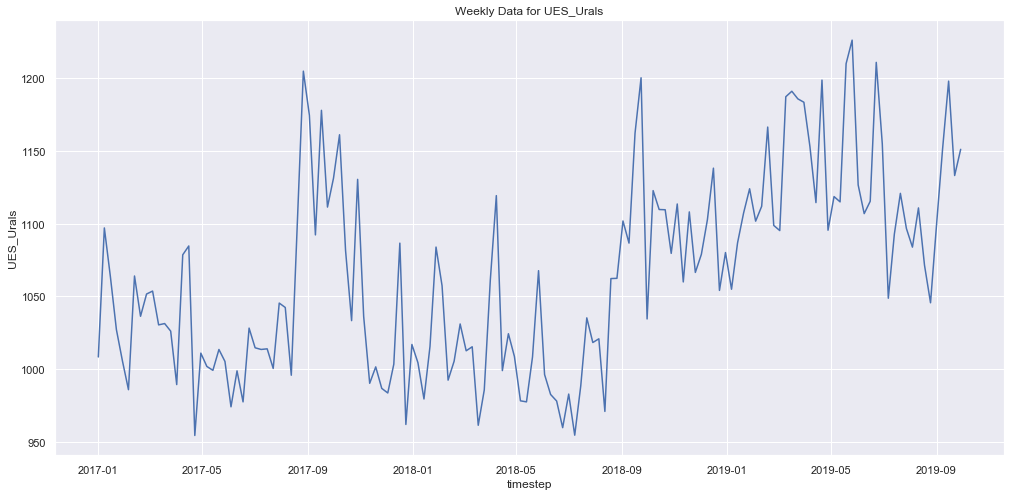

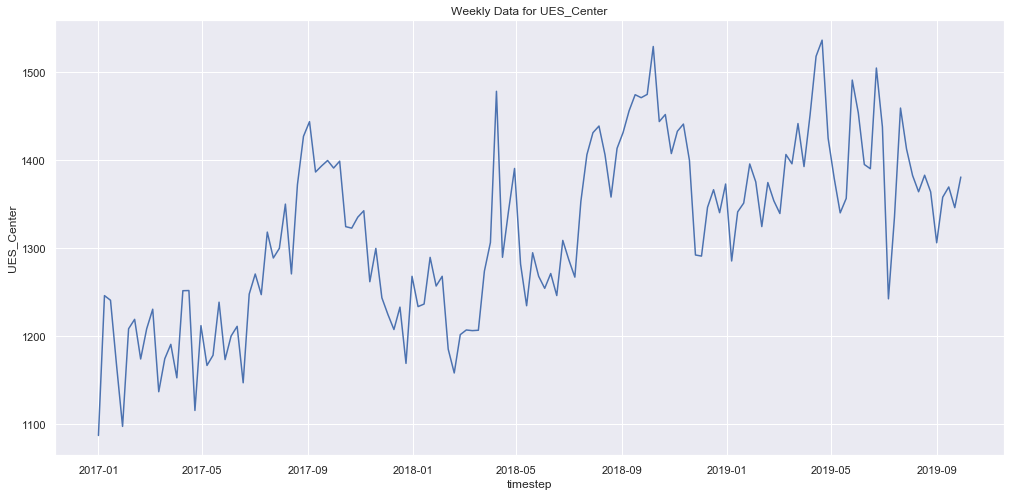

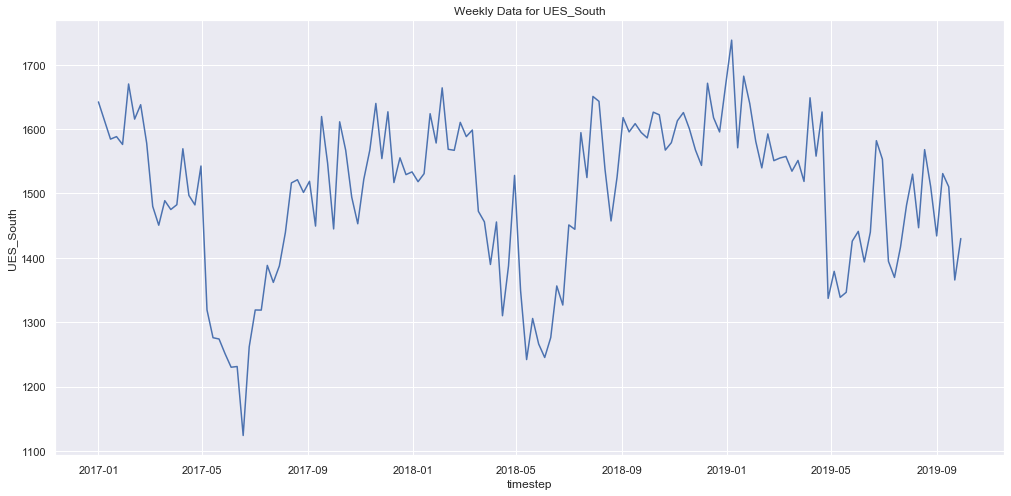

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

{'MAPE': 8.216492180318738, 'MAE': 103.40022791341309}
{'MAPE': 12.539865594608779, 'MAE': 129.38053169374433}
{'MAPE': 5.420396522026096, 'MAE': 73.52266884289425}
{'MAPE': 4.359322336896482, 'MAE': 51.00113290226469}
{'MAPE': 4.545607241856617, 'MAE': 64.00921187374712}
{'MAPE': 6.333351765468669, 'MAE': 93.13669513627154}


     Actul Value   Prediction   Pred_lower   Pred_Upper
124  1257.003750  1328.146035  1258.968499  1398.431084
125  1309.701310  1338.655428  1270.372074  1410.292628
126  1248.559583  1331.217303  1257.800046  1404.362020
127  1167.534881  1313.583287  1248.686929  1385.784846
128  1115.149940  1294.734041  1224.575152  1367.068226
129  1223.061488  1282.385785  1210.621797  1352.723689
130  1181.916786  1284.613884  1212.103785  1351.625705
131  1079.749226  1304.059265  1232.735908  1378.734153
132  1149.973155  1328.764158  1257.301929  1398.887577
133  1220.446667  1337.065552  1270.046999  1413.174906


     Actul Value  Prediction  Pred_lower  Pred_Upper
124  1124.400536  828.433206  765.526678  889.200239
125  1076.868988  788.787857  729.779570  850.790613
126   976.663750  783.789222  721.072458  844.395994
127  1034.133274  816.299849  754.104209  880.059071
128  1038.508869  859.745519  795.597373  922.036521
129  1034.665119  879.523201  817.928242  940.292478
130   988.866190  865.415581  810.580171  927.602659
131   944.343333  839.312771  778.064188  899.350437
132   919.135238  828.954444  766.708430  892.179718
133   892.428869  837.841390  775.921437  897.711656


     Actul Value   Prediction   Pred_lower   Pred_Upper
124  1320.432202  1291.392458  1248.440657  1338.791267
125  1438.896071  1283.718491  1241.867922  1328.013768
126  1390.080655  1268.729658  1223.285203  1312.068982
127  1314.243214  1261.057133  1217.130391  1306.933089
128  1340.981607  1260.607804  1217.069233  1304.439721
129  1408.521607  1260.729801  1215.418652  1302.924073
130  1333.931012  1265.897262  1221.120933  1310.751749
131  1207.134821  1290.157988  1244.629691  1336.043398
132  1289.538988  1335.987062  1289.958396  1381.366666
133  1307.683512  1383.315408  1339.857421  1424.383791


     Actul Value   Prediction   Pred_lower   Pred_Upper
124  1209.906786  1122.359254  1076.849149  1168.449031
125  1226.062083  1125.843243  1081.166169  1168.581705
126  1126.613810  1118.053132  1073.841444  1164.388334
127  1106.907917  1109.093900  1065.308981  1148.787009
128  1115.410238  1104.881386  1059.130252  1149.480972
129  1210.801845  1105.463412  1062.866859  1152.832705
130  1154.867976  1110.756621  1066.665289  1157.336845
131  1048.803869  1122.028949  1077.366366  1167.013655
132  1092.824107  1136.969486  1093.589182  1179.319521
133  1120.833929  1148.112610  1103.554989  1190.623931


     Actul Value   Prediction   Pred_lower   Pred_Upper
124  1356.246905  1384.648548  1335.824296  1435.599267
125  1490.801905  1375.823602  1325.767927  1423.128228
126  1453.618452  1368.660884  1317.897539  1414.728108
127  1394.789881  1372.827840  1325.962837  1425.698544
128  1389.940536  1384.039819  1338.050780  1434.638668
129  1504.510060  1393.286067  1347.496161  1447.406384
130  1437.514167  1402.906665  1353.808812  1451.342983
131  1242.003988  1425.094655  1375.520807  1475.864221
132  1334.954048  1463.155764  1409.904279  1512.045720
133  1458.978333  1501.141958  1451.776676  1547.270798


     Actul Value   Prediction   Pred_lower   Pred_Upper
124  1346.439286  1326.919934  1253.813875  1397.433292
125  1425.932976  1304.768310  1234.378242  1381.029078
126  1441.119464  1298.323474  1225.558531  1370.066928
127  1393.593036  1300.811964  1229.384597  1373.000021
128  1439.985774  1314.944518  1239.951775  1384.530823
129  1582.022057  1346.936064  1273.918200  1417.924938
130  1553.085471  1396.391078  1321.426302  1465.972713
131  1394.626350  1453.872948  1381.235147  1530.176193
132  1369.547500  1506.900525  1435.041444  1575.870782
133  1416.737381  1546.551781  1477.218257  1607.765424


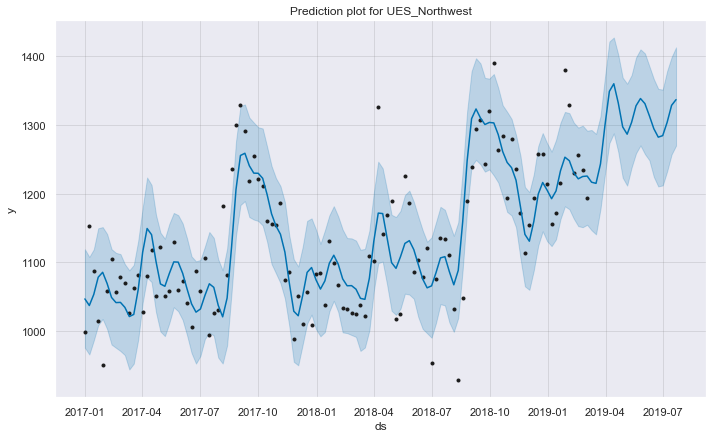

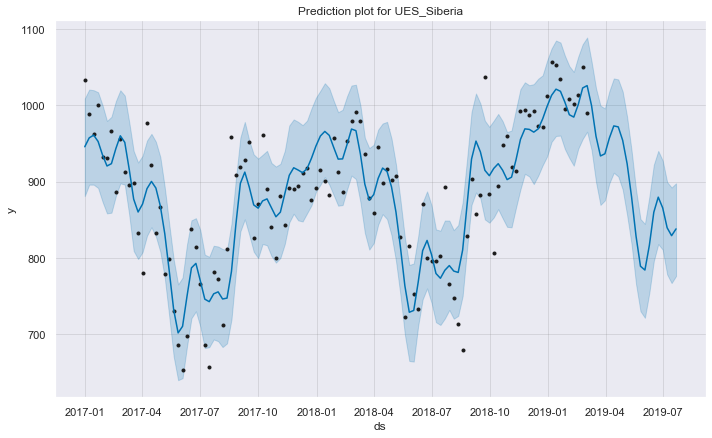

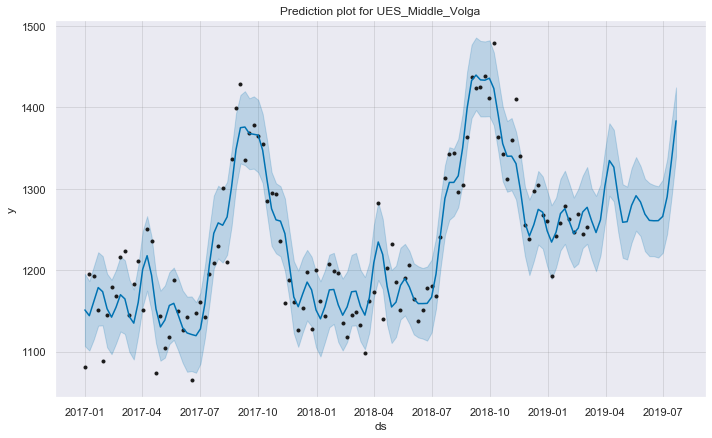

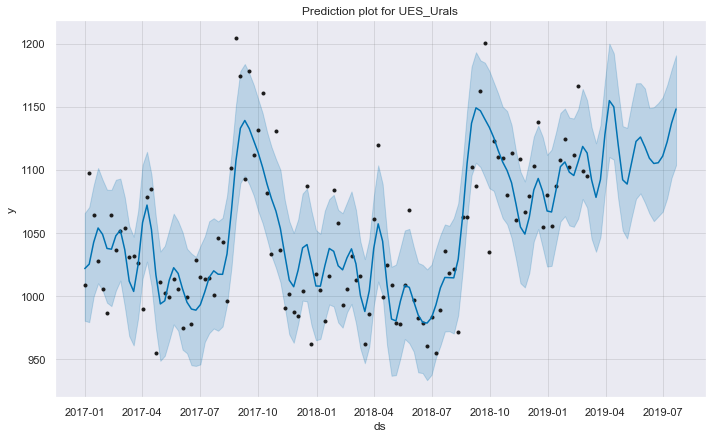

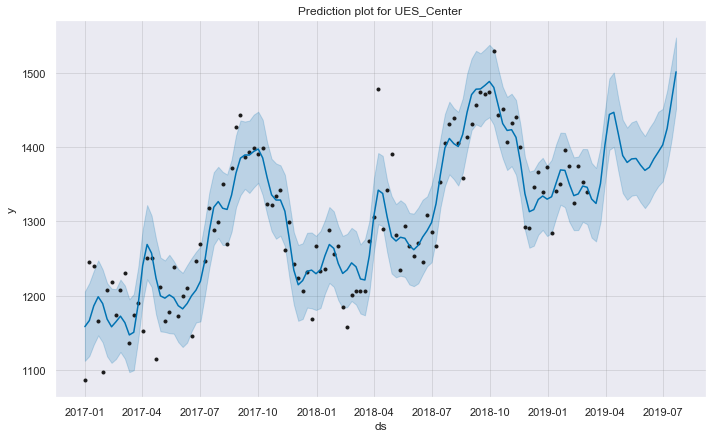

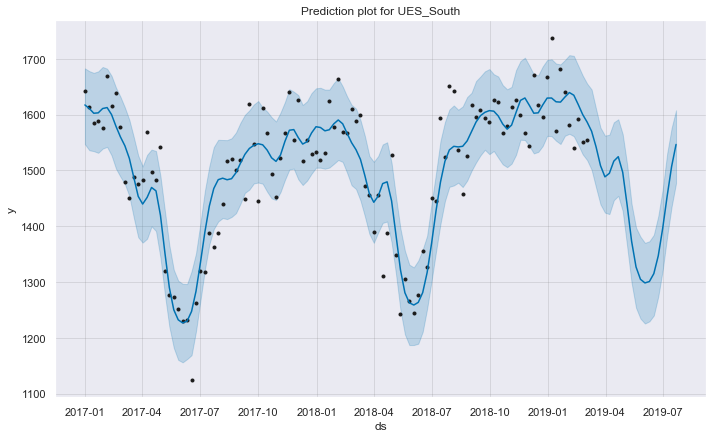

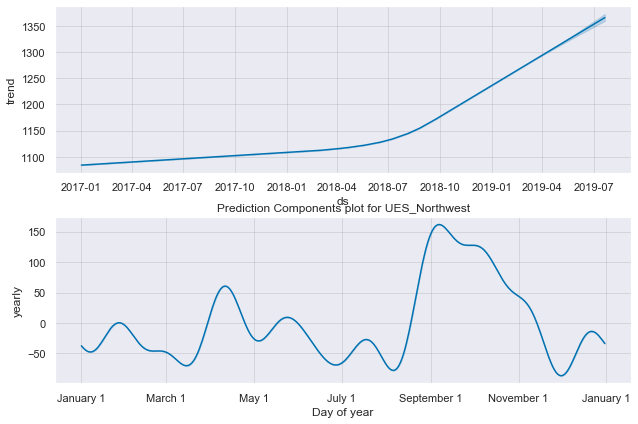

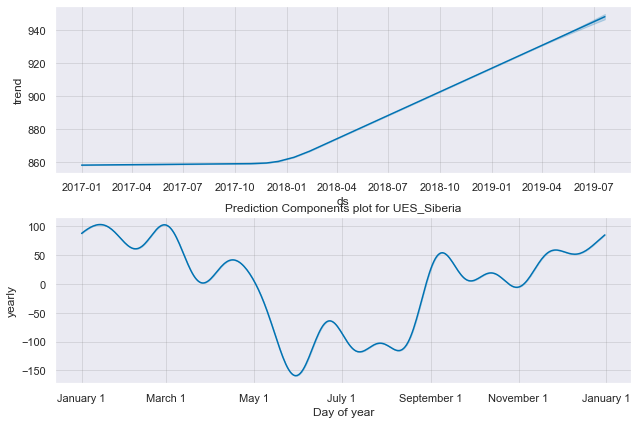

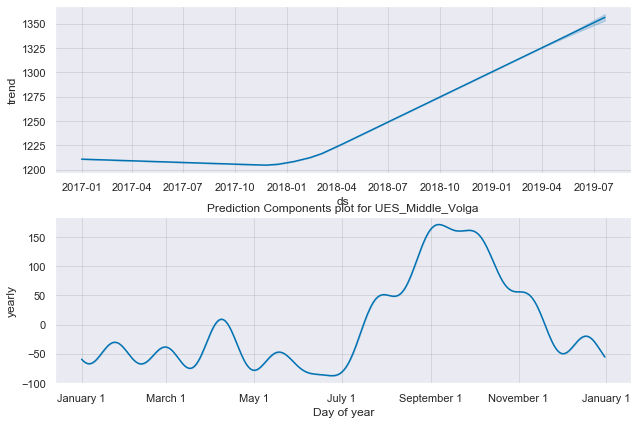

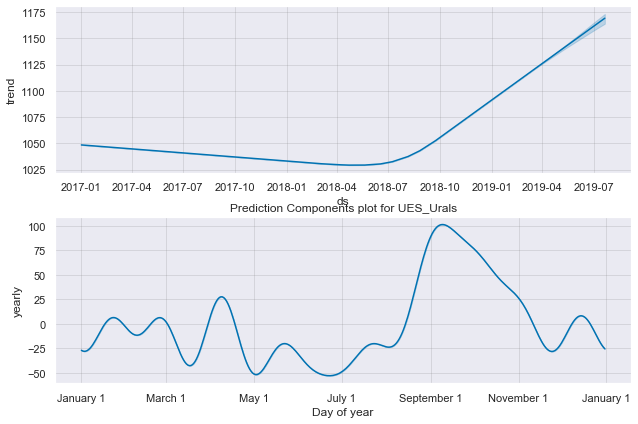

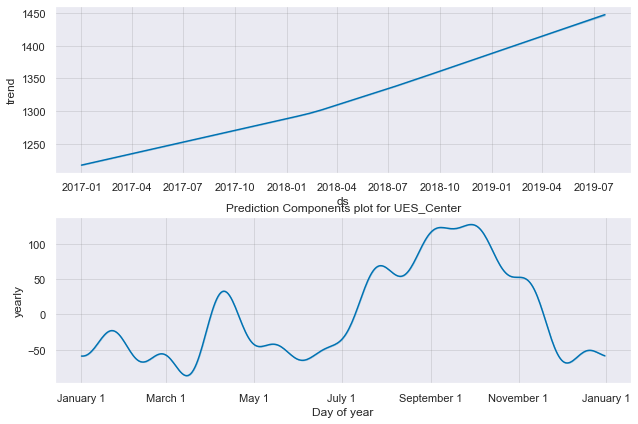

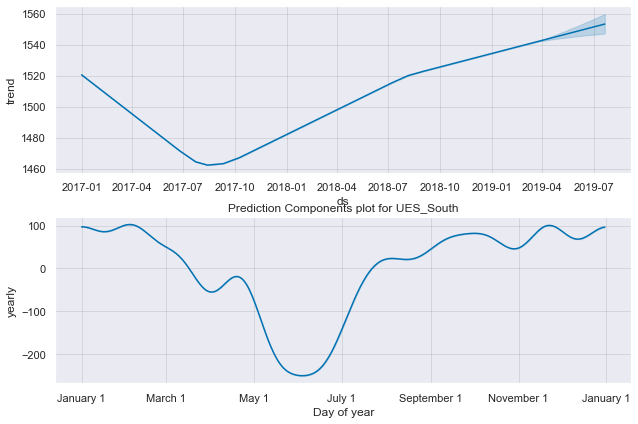

In [169]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(UES_dayahead_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print(pred_error)

    
# Plot forecast with upper and lower bounds
count = 0
for item, ls, colu in zip(forcast_lst, lst, weekly_data):
    item = item[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    item["y"] = ls[["y"]]
    item = item.sort_index(axis = 1)
    df = item
    l = locals()
    cols_plt = ["y", "yhat", "yhat_lower", "yhat_upper"]
    l["fig_" + str(count)] = px.line(df, x= "ds", y= ["y", "yhat", "yhat_lower", "yhat_upper"], 
                  hover_data={"ds": "|%B %d, %Y"}, 
                  title= (f'Time series Prediction Plot for {colu} UES_intraday_price' ))
    l["fig_" + str(count)].update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")])))
    l["fig_" + str(count)].show()
    count += 1
    print(pd.DataFrame(pred_table(item)))


In [170]:
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                       
2017-01-01 00:00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00:00         847.10      1002.58            945.28     894.08   

                     UES_Center  UES_South  
timestep                                    
2017-01-01 00:00:00     1050.17    1706.30  
2017-01-01 01:00:00     1051.15    1592.17  
2017-01-01 02:00:00     1039.84    1561.85  
2017-01-01 03:00:00      977.04    1534.37  
2017-01-01 04:00:00      938.27    1517.58

In [171]:
py.plot(fig_0, filename = 'Time series Prediction Plot for UES_Northwest UES_dayahead_price', auto_open = False)
py.plot(fig_1, filename = 'Time series Prediction Plot for UES_Siberia UES_dayahead_price', auto_open = False)
py.plot(fig_2, filename = 'Time series Prediction Plot for UES_Middle_Volga UES_dayahead_price', auto_open = False)
py.plot(fig_3, filename = 'Time series Prediction Plot for UES_Urals UES_dayahead_price', auto_open = False)
py.plot(fig_4, filename = 'Time series Prediction Plot for UES_Center UES_dayahead_price', auto_open = False)
py.plot(fig_5, filename = 'Time series Prediction Plot for UES_South UES_dayahead_price', auto_open = False)


'https://plotly.com/~azeezraimi26/55/'

# THANK YOU!